### **Importing Necessory Libraries**

In [139]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Data Exploration**

In [140]:
# Read the CSV files
df1 = pd.read_csv(r"order_details.csv")
df2 = pd.read_csv(r"orders.csv")
df3 = pd.read_csv(r"pizza_types.csv", encoding='unicode_escape')
df4 = pd.read_csv(r"pizzas.csv")

# Merge the dataframes
order_data = pd.merge(df1, df2, on='order_id')
pizza_data = pd.merge(df3, df4, on='pizza_type_id')
data = pd.merge(order_data, pizza_data, on='pizza_id')

# Display the merged data
data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00


In [141]:
data.shape

(48620, 12)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  size              48620 non-null  object 
 11  price             48620 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [143]:
data['order_details_id'].nunique()

48620

In [144]:
df = data.drop(columns=['order_details_id'], axis=1)

In [145]:
df.shape

(48620, 11)

In [146]:
df.head()

,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       48620 non-null  int64  
 1   pizza_id       48620 non-null  object 
 2   quantity       48620 non-null  int64  
 3   date           48620 non-null  object 
 4   time           48620 non-null  object 
 5   pizza_type_id  48620 non-null  object 
 6   name           48620 non-null  object 
 7   category       48620 non-null  object 
 8   ingredients    48620 non-null  object 
 9   size           48620 non-null  object 
 10  price          48620 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 4.1+ MB


### **Data Cleaning**

In [148]:
df.isnull().sum() #to check null values

order_id         0
pizza_id         0
quantity         0
date             0
time             0
pizza_type_id    0
name             0
category         0
ingredients      0
size             0
price            0
dtype: int64

In [149]:
df.duplicated().sum()

np.int64(0)

### **Creating New Features**

In [150]:
df.rename(columns={'name':'Pizza_name'}, inplace=True)

In [151]:
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Time'] = pd.DatetimeIndex(df['time']).hour

In [152]:
df.head()

,order_id,pizza_id,quantity,date,time,pizza_type_id,Pizza_name,category,ingredients,size,price,Month,Time
0,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,1,11
1,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,1,11
2,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,1,11
3,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,1,11
4,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,1,11


In [153]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [154]:
df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Api', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [155]:
df['Time'].unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10,  9],
      dtype=int32)

In [156]:
# Categorizing the time into meaningful ranges
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the categorization to the Time column
df['time_category'] = df['Time'].apply(categorize_time)

In [157]:
df['Total_Price'] = df['quantity'] * df['price']

### **Unique Values In The Each Columns**

In [158]:
for col in df.columns:
    print(f"{col.rjust(14)}: {df[col].nunique()}")

      order_id: 21350
      pizza_id: 91
      quantity: 4
          date: 358
          time: 16382
 pizza_type_id: 32
    Pizza_name: 32
      category: 4
   ingredients: 32
          size: 5
         price: 25
         Month: 12
          Time: 15
 time_category: 4
   Total_Price: 56


In [159]:
df['pizza_type_id'].unique()

array(['hawaiian', 'classic_dlx', 'five_cheese', 'ital_supr', 'mexicana',
       'thai_ckn', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'green_garden', 'ital_cpcllo', 'spicy_ital', 'spin_pesto',
       'veggie_veg', 'southw_ckn', 'cali_ckn', 'pepperoni', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'calabrese', 'ital_veggie', 'mediterraneo', 'peppr_salami',
       'spinach_fet', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [160]:
df['Pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [161]:
df['category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [162]:
df['size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

### **EDA**


In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,48620.0,10701.479761,6180.119770,1.00,5337.00,10682.5,16100.00,21350.00
quantity,48620.0,1.019622,0.143077,1.00,1.00,1.0,1.00,4.00
price,48620.0,16.494132,3.621789,9.75,12.75,16.5,20.25,35.95
Time,48620.0,15.911806,3.149836,9.00,13.00,16.0,18.00,23.00
Total_Price,48620.0,16.821474,4.437398,9.75,12.75,16.5,20.50,83.00


In [164]:
df.describe(exclude=['int', 'float']).T

,count,unique,top,freq
pizza_id,48620,91,big_meat_s,1811
date,48620,358,2015-11-26,261
time,48620,16382,12:32:00,26
pizza_type_id,48620,32,classic_dlx,2416
Pizza_name,48620,32,The Classic Deluxe Pizza,2416
category,48620,4,Classic,14579
ingredients,48620,32,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2416
size,48620,5,L,18526
Month,48620,12,Jul,4301
time_category,48620,4,Afternoon,23622


#### **Univeriate Analysis**

In [165]:
num_col = df.select_dtypes(include=['int', 'float']).drop(columns=['order_id'], errors='ignore').columns.tolist()
cat_col = df.select_dtypes(exclude=['int', 'float']).drop(columns=['date', 'time', 'ingredients'], errors='ignore').columns.tolist()
print(num_col)
print(cat_col)

['quantity', 'price', 'Time', 'Total_Price']
['pizza_id', 'pizza_type_id', 'Pizza_name', 'category', 'size', 'Month', 'time_category']


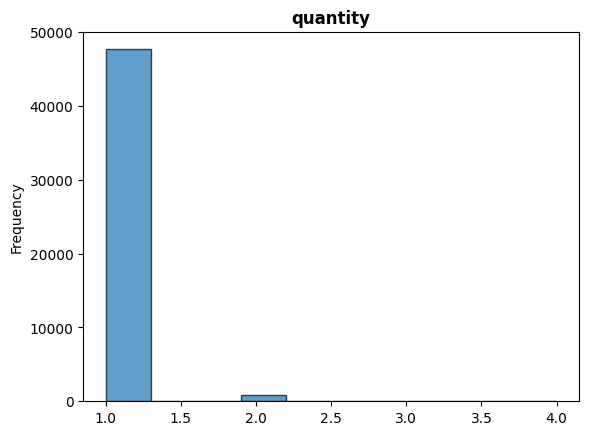

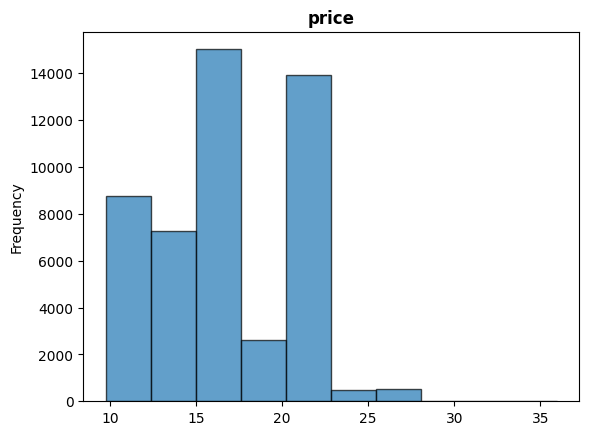

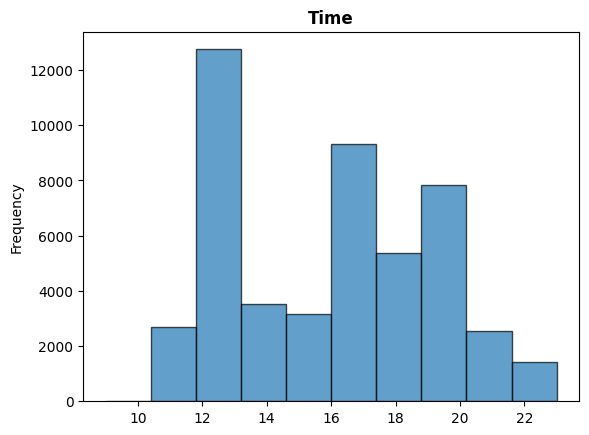

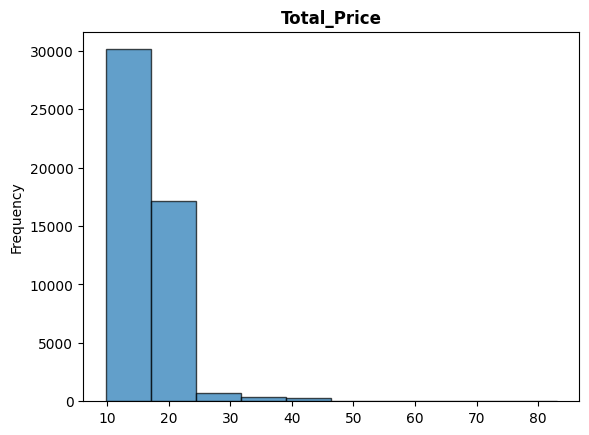

In [166]:
for col in num_col:
    
    plt.figure()
    plt.hist(df[col], bins=10, alpha=0.7, edgecolor='black')
    plt.ylabel('Frequency')
    plt.title(col, fontsize=12, fontweight='bold', color='black')

    plt.show()

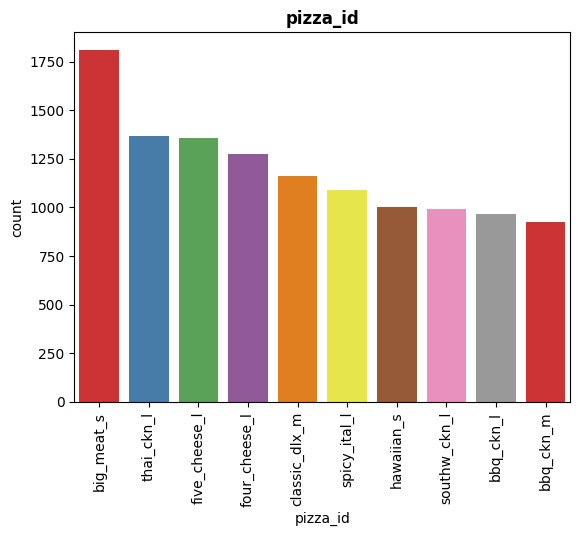

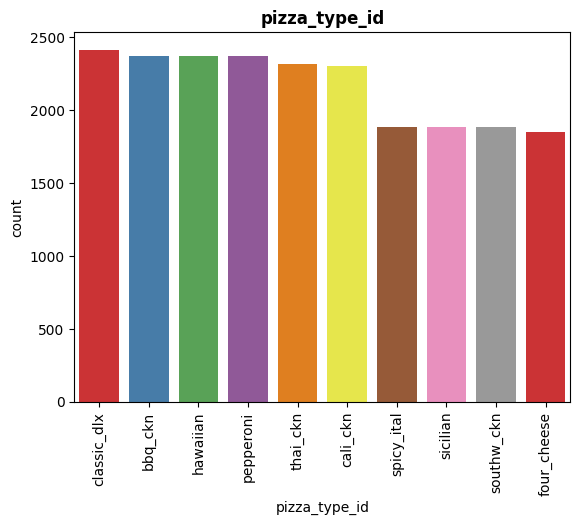

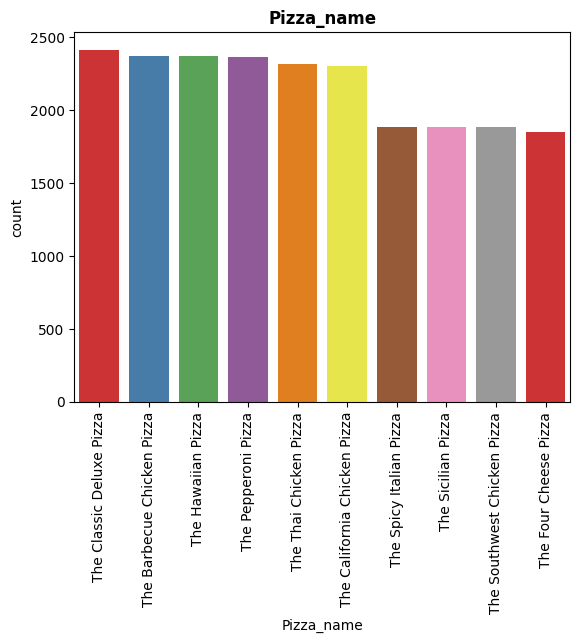

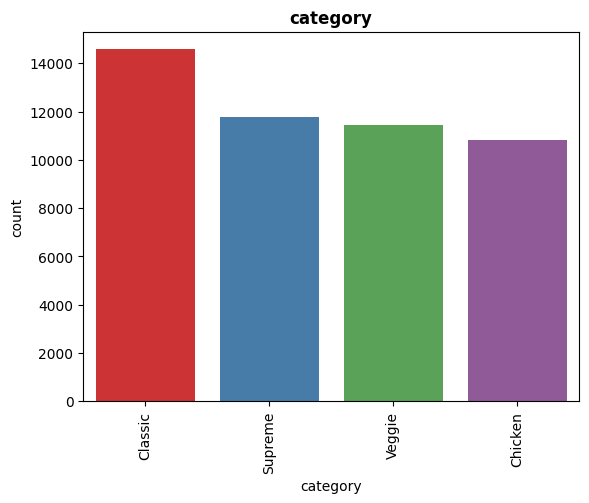

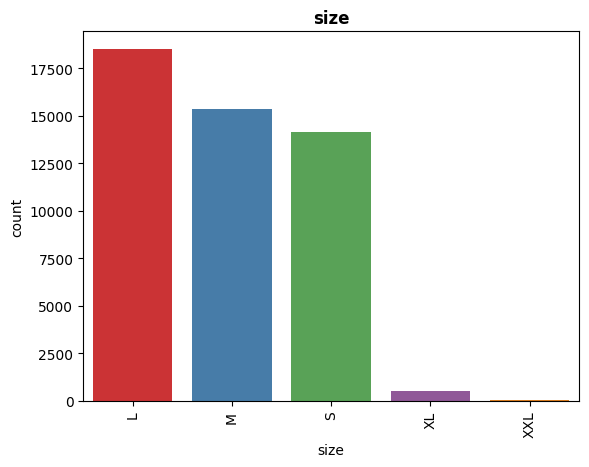

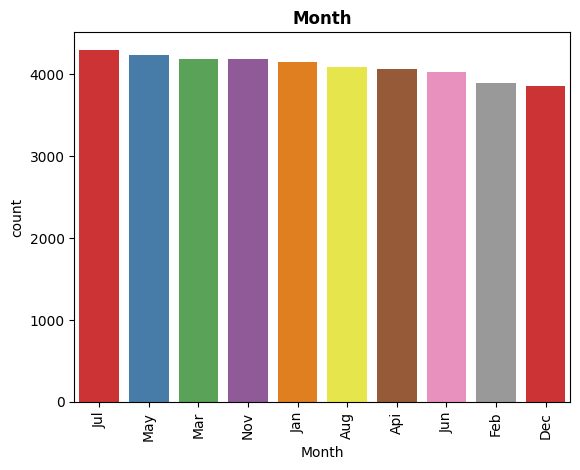

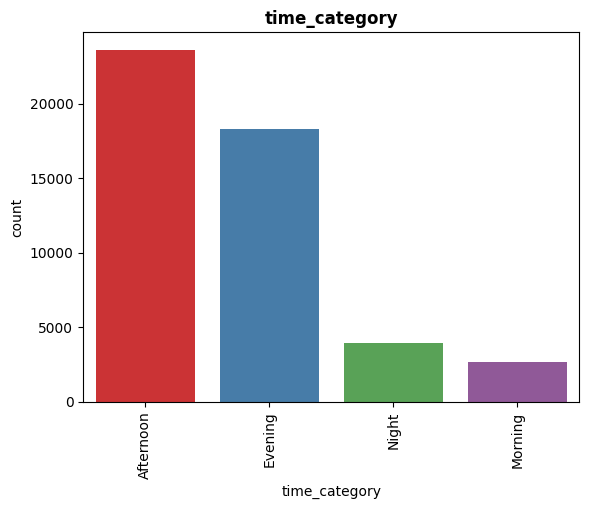

In [167]:
for col in cat_col:
    
    plt.figure()
    sns.countplot(x=col, data = df, order=df[col].value_counts().head(10).index, palette='Set1')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, fontweight='bold', color='black')
    plt.show()

### **Insights**

In [168]:
print(f"Net Sales: {df['price'].sum():.2f}")

Net Sales: 801944.70


In [169]:
print(f"Grass Sales: {df['Total_Price'].sum():.2f}")

Grass Sales: 817860.05


#### **Prices of the Pizzas**

In [170]:
price_of_pizza = df.groupby('Pizza_name')['price'].max().sort_values().reset_index()
price_of_pizza

,Pizza_name,price
0,The Big Meat Pizza,12.00
1,The Pepperoni Pizza,15.25
2,The Hawaiian Pizza,16.50
3,"The Pepperoni, Mushroom, and Peppers Pizza",17.50
4,The Four Cheese Pizza,17.95
5,The Five Cheese Pizza,18.50
6,The Green Garden Pizza,20.25
7,The Calabrese Pizza,20.25
8,The Mexicana Pizza,20.25
9,The Spinach and Feta Pizza,20.25


#### **Prices of the Pizza Sizes**

In [171]:
price_of_pizza = df.groupby('size')['price'].max().sort_values().reset_index()
price_of_pizza
price_of_pizza

,size,price
0,M,16.75
1,L,21.00
2,S,23.65
3,XL,25.50
4,XXL,35.95


#### **Prices of the Pizza Category**

In [172]:
price_of_pizza = df.groupby('category')['price'].max().sort_values().reset_index()
price_of_pizza
price_of_pizza

,category,price
0,Chicken,20.75
1,Veggie,21.00
2,Supreme,23.65
3,Classic,35.95


In [173]:
qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']
for col in qua_col:
    quantity_analysis = df.groupby(col).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).reset_index()
    print(f"\nquantity_analysis of {col}")
    print(quantity_analysis)


quantity_analysis of Pizza_name
                                    Pizza_name  quantity
0                     The Classic Deluxe Pizza      2453
1                   The Barbecue Chicken Pizza      2432
2                           The Hawaiian Pizza      2422
3                          The Pepperoni Pizza      2418
4                       The Thai Chicken Pizza      2371
5                 The California Chicken Pizza      2370
6                           The Sicilian Pizza      1938
7                      The Spicy Italian Pizza      1924
8                  The Southwest Chicken Pizza      1917
9                           The Big Meat Pizza      1914
10                       The Four Cheese Pizza      1902
11                   The Italian Supreme Pizza      1884
12           The Vegetables + Vegetables Pizza      1526
13                          The Mexicana Pizza      1484
14                        The Napolitana Pizza      1464
15            The Prosciutto and Arugula Pizza      145

### **Quantity Analysis**

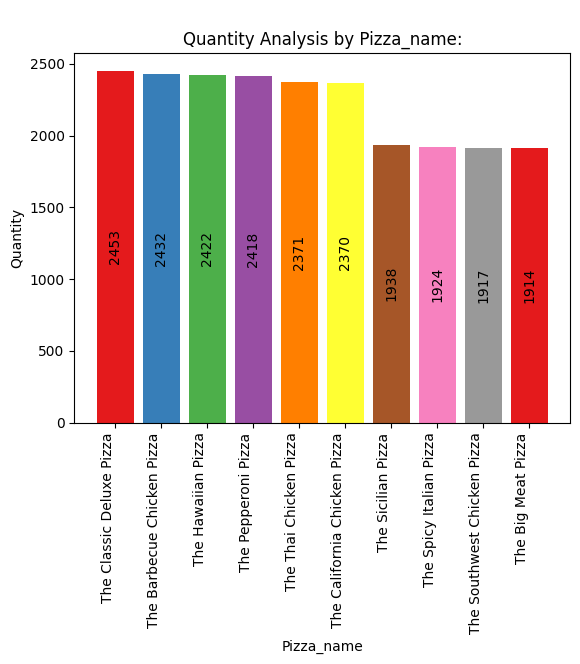

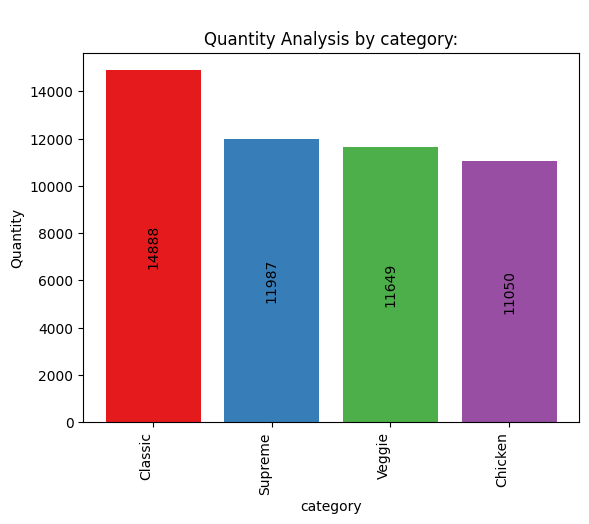

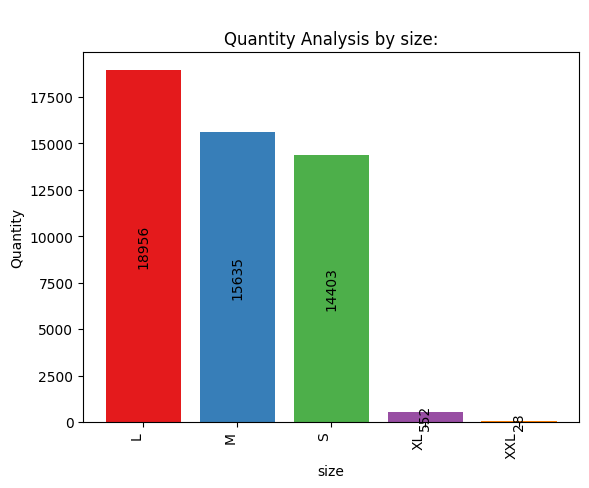

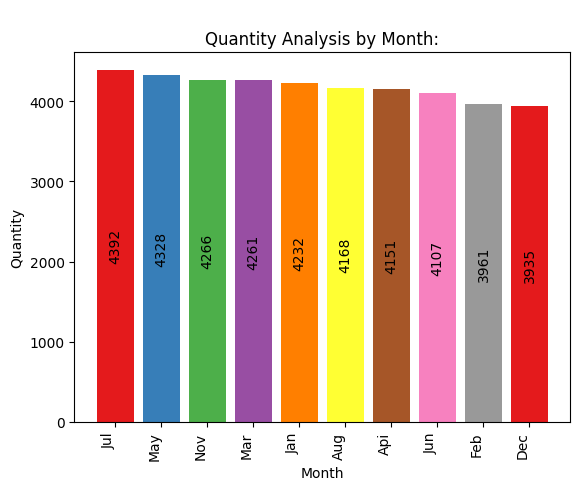

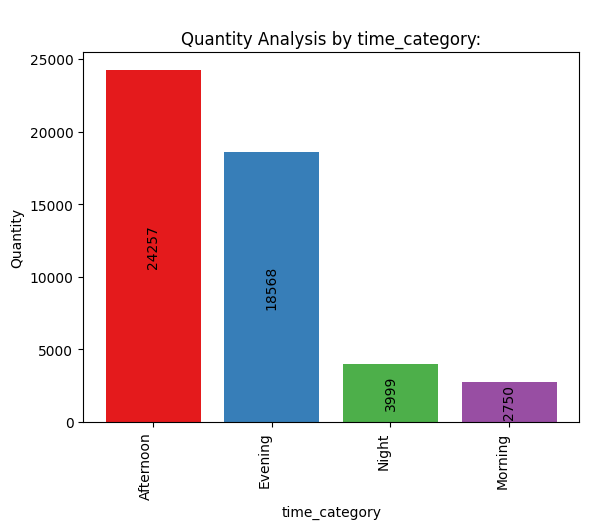

In [174]:
qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

for col in qua_col:  
    analysis= df.groupby(col).agg({'quantity': 'sum'}).sort_values(by='quantity',ascending=False).reset_index().head(10)
    bar_value = plt.bar(analysis[col], analysis['quantity'], color=sns.color_palette('Set1'))
    plt.bar_label(bar_value, label_type='center', rotation=90)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel(col)
    plt.ylabel('Quantity')
    plt.title(f'\nQuantity Analysis by {col}:')
    plt.show()

### **Price Analysis**

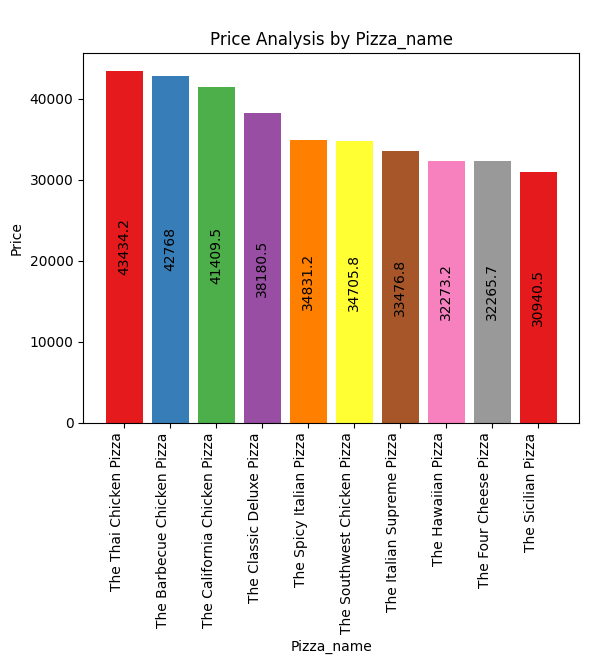

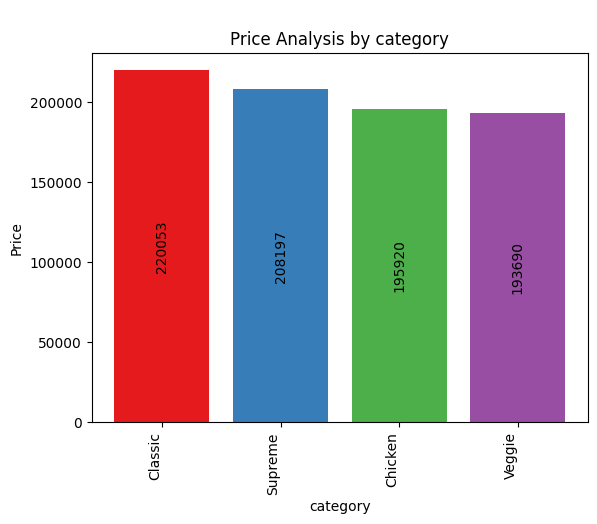

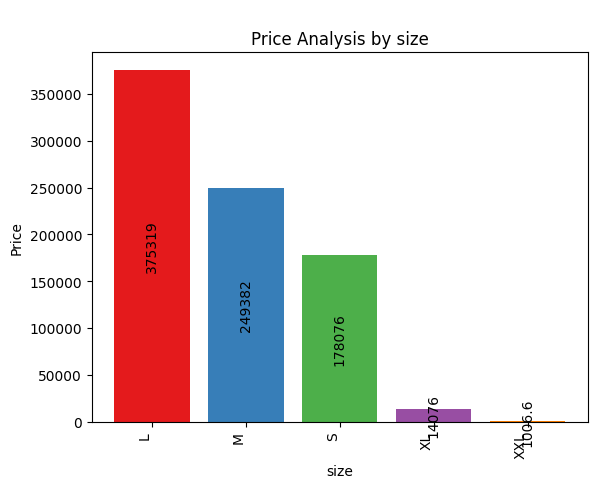

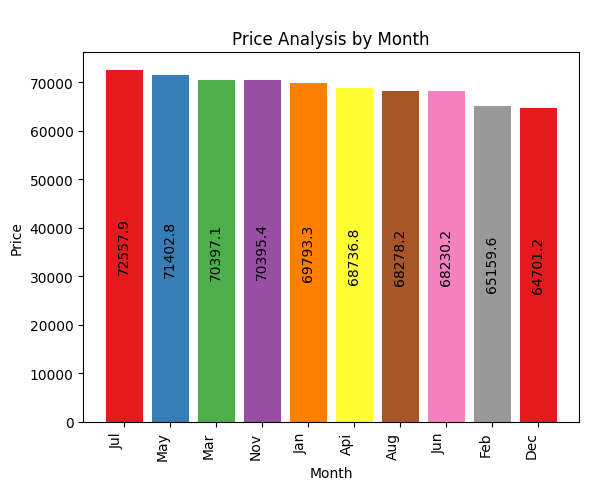

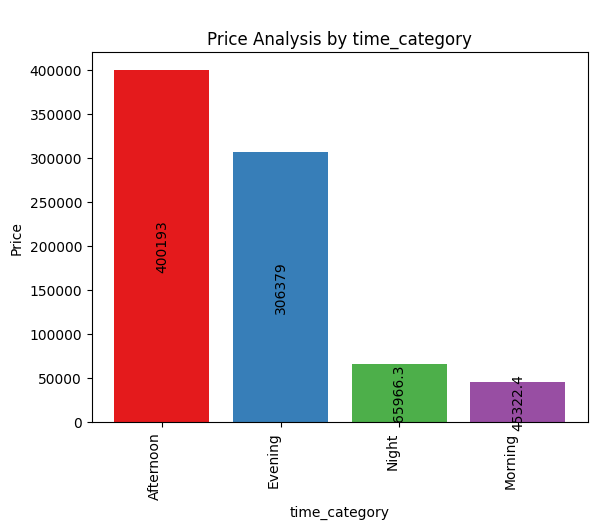

In [175]:
qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

for col in qua_col:  
    analysis= df.groupby(col).agg({'Total_Price': 'sum'}).sort_values(by='Total_Price',ascending=False).reset_index().head(10)
    bar_value = plt.bar(analysis[col], analysis['Total_Price'], color=sns.color_palette('Set1'))
    plt.bar_label(bar_value, label_type='center', rotation=90)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'\nPrice Analysis by {col}')
    plt.show()

### **Average Number of Ingredients by Category***

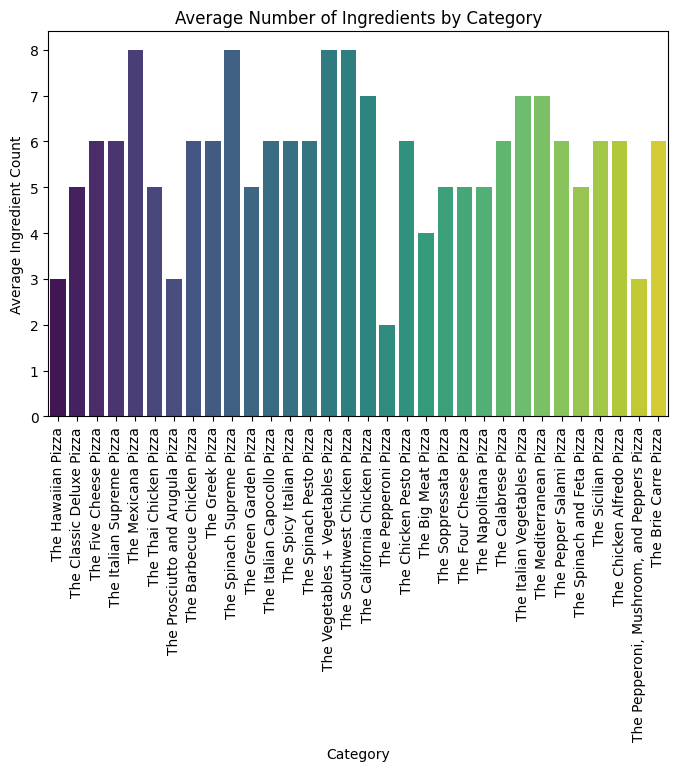

In [176]:
# Top ingredients analysis
df['ingredients_count'] = df['ingredients'].apply(lambda x: len(x.split(',')))
plt.figure(figsize=(8, 5))
sns.barplot(x='Pizza_name', y='ingredients_count', data=df, palette='viridis')
plt.title('Average Number of Ingredients by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Ingredient Count')
plt.show()

### **Analyzing Sales And Quantity on Perticular Month (or) Timings**

In [ ]:
def quantity_analysis(df, filter_col=None, filter_value=None):

    # Apply filter if specified
    if filter_col and filter_value:
        filtered_df = df[df[filter_col] == filter_value]
    else:
        filtered_df = df

    qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

    for col in qua_col:  
        analysis= df.groupby(col).agg({'quantity': 'sum'}).sort_values(by='quantity',ascending=False).reset_index().head(10)
        bar_value = plt.bar(analysis[col], analysis['quantity'], color=sns.color_palette('Set1'))
        plt.bar_label(bar_value, label_type='center', rotation=90)
        plt.xticks(rotation=90, ha='right')
        plt.xlabel(col)
        plt.ylabel('Quantity')
        plt.title(f'\nQuantity Analysis by {col}')
        plt.show()


In [ ]:
def Sales_analysis(df, filter_col=None, filter_value=None):

    # Apply filter if specified
    if filter_col and filter_value:
        filtered_df = df[df[filter_col] == filter_value]
    else:
        filtered_df = df

    qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

    for col in qua_col:  
        analysis= df.groupby(col).agg({'Total_Price': 'sum'}).sort_values(by='Total_Price',ascending=False).reset_index().head(10)
        bar_value = plt.bar(analysis[col], analysis['Total_Price'], color=sns.color_palette('Set1'))
        plt.bar_label(bar_value, label_type='center', rotation=90)
        plt.xticks(rotation=90, ha='right')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.title(f'\nPrice Analysis by {col}')
        plt.show()

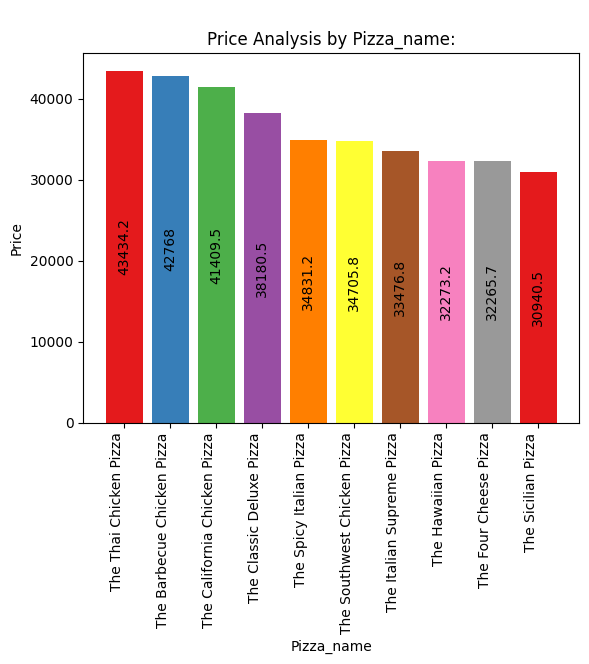

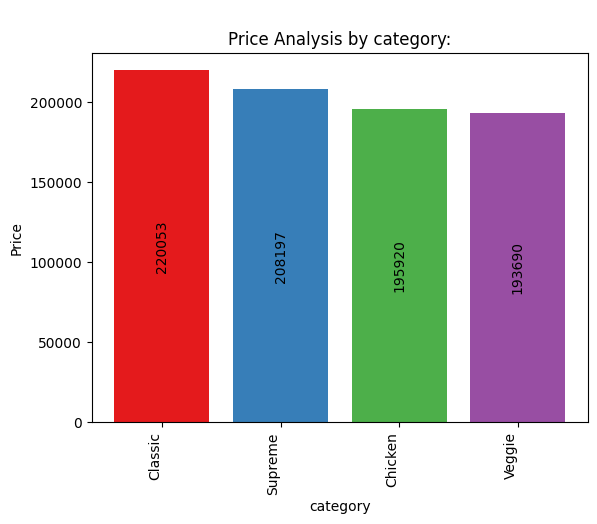

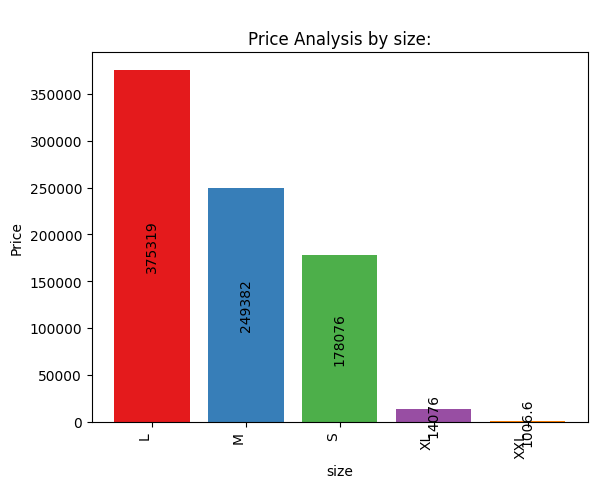

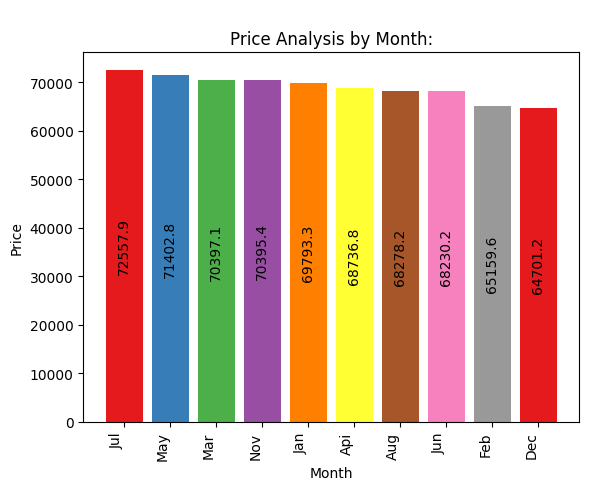

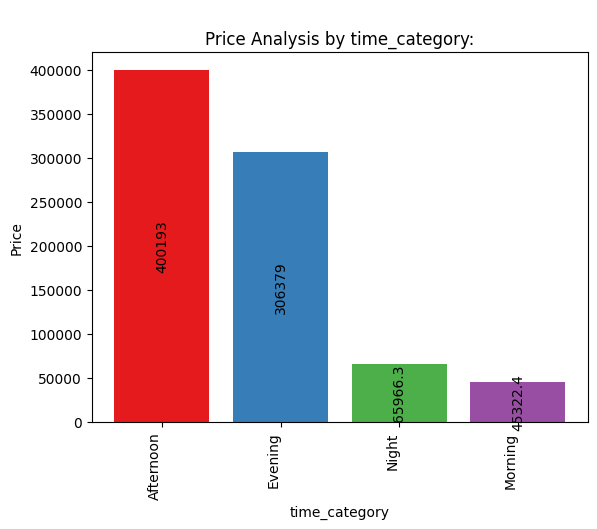

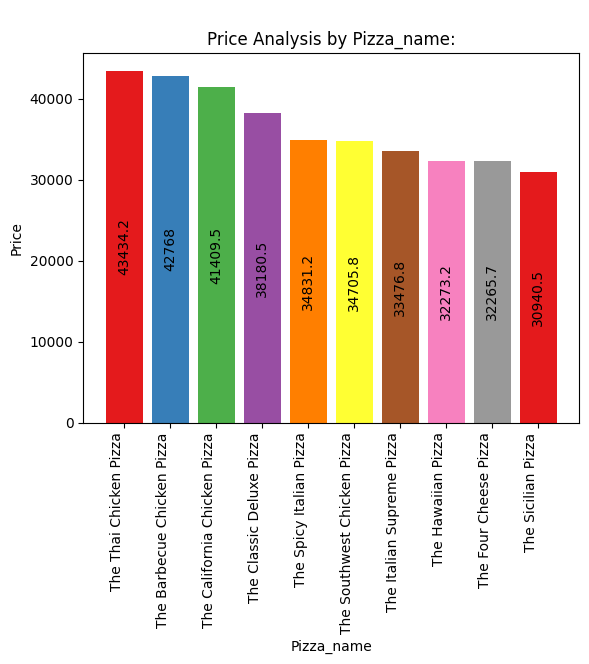

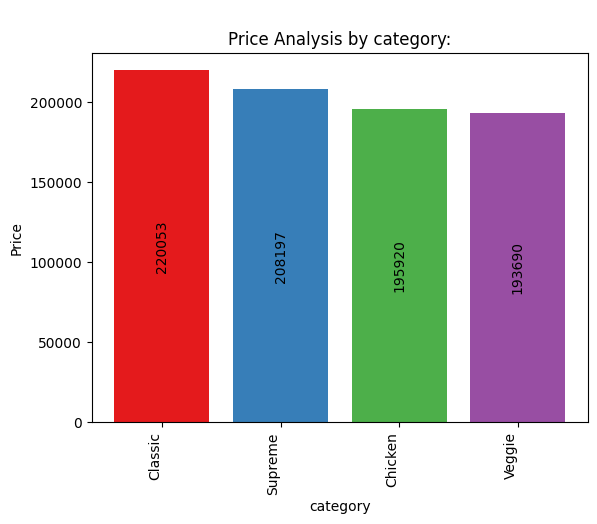

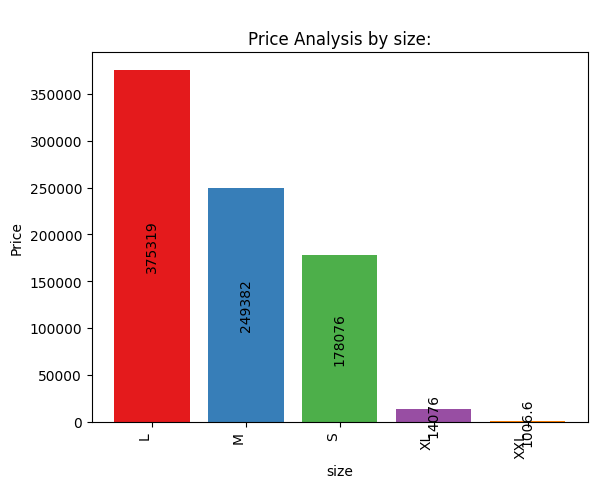

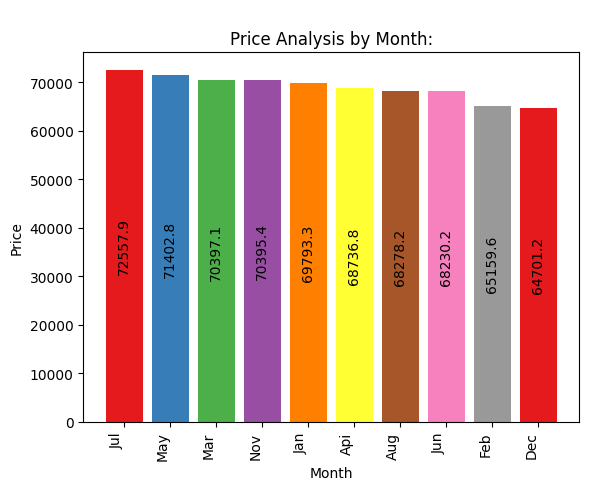

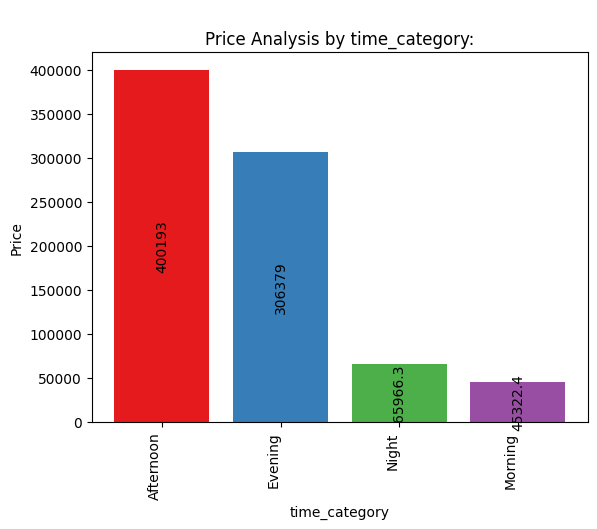

In [184]:
# Plot for specific month
quantity_analysis(df, filter_col='Month', filter_value='January')
Sales_analysis(df, filter_col='Month', filter_value='January')